## Lead Scoring with Logistic Regression
##### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns',500)

## [Step 1. Reading and Understanding the Data](#step1)

## [Step 2.Data Cleaning and EDA](#step2)
[2.1 Missing value check](#step2.1)<br>
[2.2 Cleaning and Visualizing categorical variables](#step2.2)<br>
[2.3 Cleaning and Visualizing numerical variables](#step2.3)<br>
[2.4 Outlier Treatment](#step2.4)<br>
[2.5 Check for duplicates](#step2.5)<br>
[2.6 Check for data type conversion](#step2.6)<br>

## [Step 3. Preprocessing and Data Preparation](#step3)
[3.1 Categorizing variables](#step3.1)<br>
[3.2 Creating dummy variables](#step3.2)<br>
[3.3 Train test split](#step3.3)<br>
[3.4 Scaling data](#step3.4)<br>

## [Step 4. Model Building](#Step4)



The above steps will be covered to build the model. 

## Step 1. Reading and Understanding the Data<a id='step1'></a>

In [3]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
lead_data.shape

(9240, 37)

In [6]:
lead_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


Out of 37 columns above 5 seems to be numeric ones

In [7]:
#Checking data imbalance
lead_data['Converted'].mean()

0.3853896103896104

#### Only 38% of the leads were converted

In [8]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
#renaming lengthy names of columns
lead_data = lead_data.rename({'Total Time Spent on Website':'Website Time','What is your current occupation': 'Occupation','What matters most to you in choosing a course':'Reason','A free copy of Mastering The Interview':'Free copy required'}, axis=1)
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Website Time', 'Page Views Per Visit', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education', 'Occupation',
       'Reason', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Tags', 'Lead Quality', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque', 'Free copy required',
       'Last Notable Activity'],
      dtype='object')

## Step 2.Data Cleaning and EDA<a id='step2'></a>

#### 2.1 Missing value check<a id=step2.1></a>


In [10]:
# sum it up to check how many rows have all missing values
lead_data.isnull().all(axis=1).sum()

0

In [11]:
len(lead_data[lead_data.isnull().sum(axis=1)>5].index)


2923

In [12]:
# % of the missing values (column-wise)
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)


Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Website Time                                 0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              15.56
How did you hear about X Education          23.89
Occupation                                  29.11
Reason                                      29.32
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00


#### We do see lots of missing values and most of columns have greater than 20% missing values. Lets divide the columns into categorical and numerical and handle them one by one.

#### 2.2 Cleaning and Visualizing categorical variables<a id='step2.2'></a>

In [13]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Website Time,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,Occupation,Reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,Free copy required,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
cat_cols = ['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'Occupation',
       'Reason', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index','I agree to pay the amount through cheque',
       'Free copy required', 'Last Notable Activity']

In [15]:
len(cat_cols)

29

In [16]:
#Function to check total counts, skewness and importance of a categorical column based on conversion rate. 
def check_count_conversion_rate(X):
    #checking counts of col
    col_counts = pd.DataFrame(lead_data[X].value_counts()).reset_index()
    col_counts.columns = [X,'Counts']
    col_counts['Total%'] = col_counts['Counts']/len(lead_data.index)
    #checking conversion rate by col
    groupby_col = pd.DataFrame(lead_data.groupby(X)['Converted'].mean()).reset_index()

    col_counts_percentage = col_counts.merge(groupby_col,how='inner',on=X)
    return col_counts_percentage

In [17]:
def check_2_col_count_conversion_rate(X):
    col_counts = pd.DataFrame(lead_data.groupby(X)[X[1]].count())
    col_counts.columns = ['Counts']
    col_counts.reset_index()
     #checking conversion rate by col
    groupby_col = pd.DataFrame(lead_data.groupby(X)['Converted'].mean()).reset_index()
    groupby_col
    col_counts_percentage = pd.merge(col_counts, groupby_col,  how='left', left_on=X, right_on = X)
    return col_counts_percentage

In [18]:
round(100*(lead_data[cat_cols].isnull().sum()/len(lead_data.index)), 2)


Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Last Activity                                1.11
Country                                     26.63
Specialization                              15.56
How did you hear about X Education          23.89
Occupation                                  29.11
Reason                                      29.32
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Tags                                        36.29
Lead Quality                                51.59


The value of `Select` in categorical columns are treated as null.Therefore, willconvert `Select` value to `NaN` before checking the actual missing value percentage of a particular column.

#### Checking skewed categorical Variable

In [19]:
def check_skewness(X):
    count_of_values = lead_data[X].value_counts().values
    count_of_values = count_of_values/len(lead_data)
    col_of_values = list(lead_data[X].value_counts().index)
    dict_data = {}
    for i in range(0,len(col_of_values)):
        dict_data[col_of_values[i]] = count_of_values[i]
    df = pd.DataFrame(data=dict_data,index=[X])
    return df

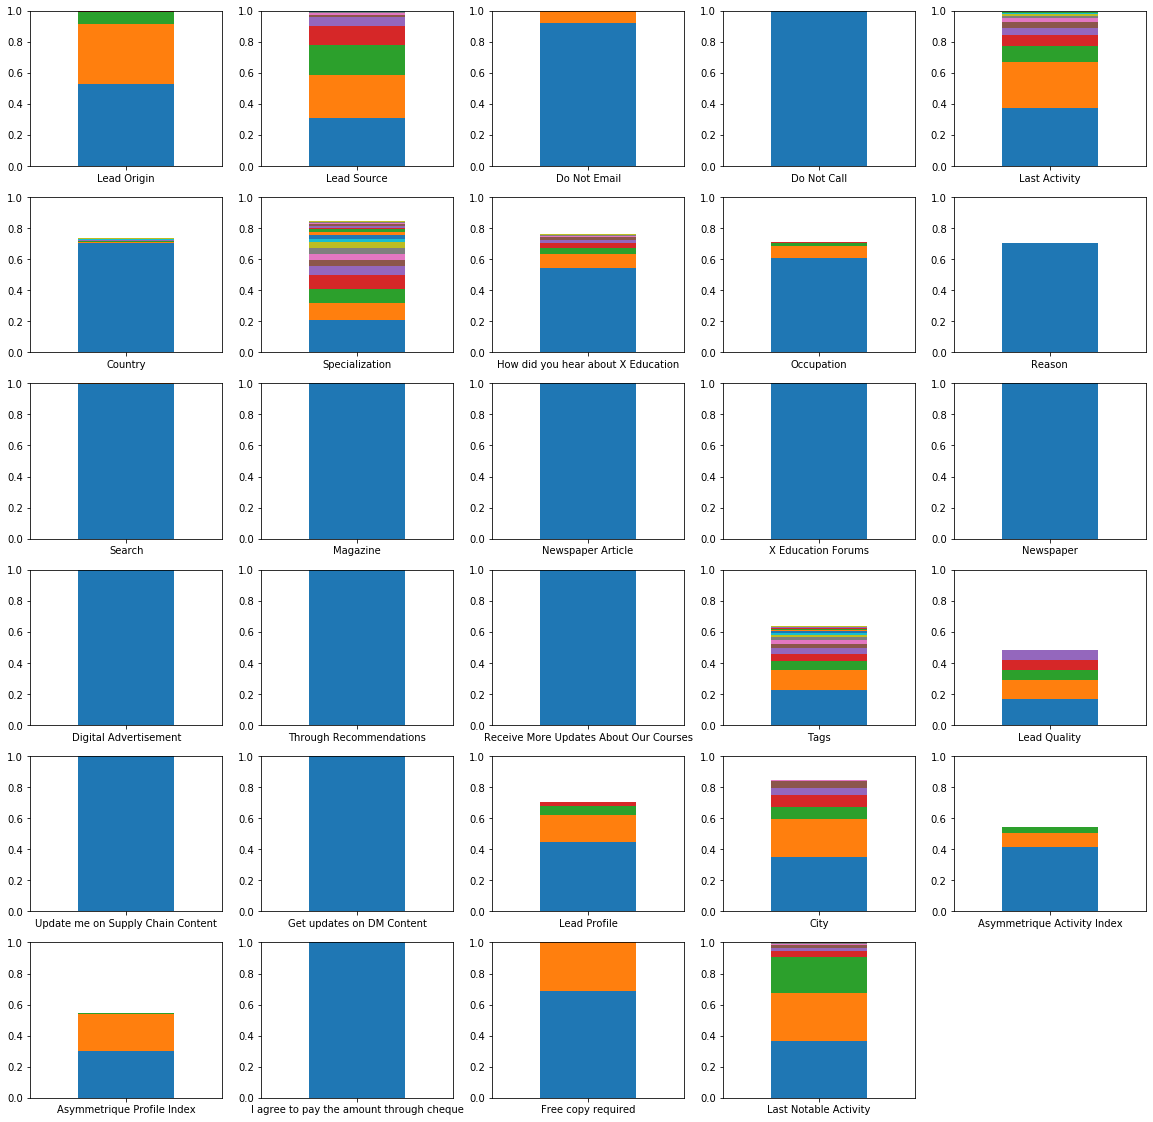

In [20]:
plt.figure(figsize=[20,20])
skewness = []
for i in range(0,len(cat_cols)):
    ax = plt.subplot(6,5,i+1)
    skewness.append(check_skewness(cat_cols[i]))
    skewness[i].plot(kind='bar',stacked=True,ax = ax)
    ax.legend().set_visible(False)
    plt.xticks(rotation=0)
    ax.set_ylim([0.0,1.0])
plt.show()

#check_skewness(cat_cols[4]).plot.bar(stacked=True)

#### Inference:
- We see lot of columns that are skewed and has only one value more than 90% of the time
- The reason some bars are not 100% complete is because of the presence of null values.
- Its better to delete highly skewed columns as they will not be helpfull in predictions.

In [21]:
#Deleting cols where 90% of the values are same
skewed_cols = ['Do Not Email', 'Do Not Call',
       'Reason', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque']
lead_data.drop(skewed_cols,axis=1,inplace=True)
lead_data.shape

(9240, 23)

In [22]:
for i in skewed_cols:
    cat_cols.remove(i)
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'Occupation',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Free copy required',
 'Last Notable Activity']

In [23]:
round(100*(lead_data[cat_cols].isnull().sum()/len(lead_data.index)), 2)


Lead Origin                            0.00
Lead Source                            0.39
Last Activity                          1.11
Country                               26.63
Specialization                        15.56
How did you hear about X Education    23.89
Occupation                            29.11
Tags                                  36.29
Lead Quality                          51.59
Lead Profile                          29.32
City                                  15.37
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Free copy required                     0.00
Last Notable Activity                  0.00
dtype: float64

In [24]:
#deleting cols where missing % is greater than 45%
missing_45 = ['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index']
lead_data.drop(missing_45,axis=1,inplace=True)
print("final shape = {}".format(lead_data.shape))
for i in missing_45:
    cat_cols.remove(i)
cat_cols

final shape = (9240, 20)


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'Occupation',
 'Tags',
 'Lead Profile',
 'City',
 'Free copy required',
 'Last Notable Activity']

In [25]:
round(100*(lead_data[cat_cols].isnull().sum()/len(lead_data.index)), 2)


Lead Origin                            0.00
Lead Source                            0.39
Last Activity                          1.11
Country                               26.63
Specialization                        15.56
How did you hear about X Education    23.89
Occupation                            29.11
Tags                                  36.29
Lead Profile                          29.32
City                                  15.37
Free copy required                     0.00
Last Notable Activity                  0.00
dtype: float64

In [26]:
100*(len(lead_data[lead_data[cat_cols].isnull().sum(axis=1)>6].index)/len(lead_data.index))
len(lead_data[lead_data[cat_cols].isnull().sum(axis=1)>4].index)


1437

#### Handling Lead Source

In [27]:
#checking number of missing values
lead_data['Lead Source'].isnull().sum()

36

In [28]:
check_count_conversion_rate('Lead Source').sort_values(by='Total%',ascending = False)

,Lead Source,Counts,Total%,Converted
0,Google,2868,0.310390,0.399930
1,Direct Traffic,2543,0.275216,0.321667
2,Olark Chat,1755,0.189935,0.255271
3,Organic Search,1154,0.124892,0.377816
4,Reference,534,0.057792,0.917603
5,Welingak Website,142,0.015368,0.985915
6,Referral Sites,125,0.013528,0.248000
7,Facebook,55,0.005952,0.236364
8,bing,6,0.000649,0.166667
9,google,5,0.000541,0.000000


#### Inferences:
- Google is written as google in 5 values.
- There are total 21 different values for the column
- There are few of them which were used only once. Will to combine them into others later.

In [29]:
#google to Google
lead_data.loc[(lead_data['Lead Source'] == 'google'),['Lead Source']] = 'Google'
lead_data['Lead Source'].value_counts()


Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [30]:
check_count_conversion_rate('Lead Source').sort_values(by='Converted',ascending = False)

,Lead Source,Counts,Total%,Converted
17,NC_EDM,1,0.000108,1.000000
16,WeLearn,1,0.000108,1.000000
11,Live Chat,2,0.000216,1.000000
5,Welingak Website,142,0.015368,0.985915
4,Reference,534,0.057792,0.917603
9,Click2call,4,0.000433,0.750000
10,Social Media,2,0.000216,0.500000
0,Google,2873,0.310931,0.399234
3,Organic Search,1154,0.124892,0.377816
1,Direct Traffic,2543,0.275216,0.321667


#### Inferences:
- Welingak Website has the maximum conversion rate followed by Reference
- Google and Direct Traffic has a top counts and a good conversion rate of ~35% 

Lets check the relation `Lead Origin` and `Lead Source`

In [31]:
check_count_conversion_rate('Lead Origin')

,Lead Origin,Counts,Total%,Converted
0,Landing Page Submission,4886,0.528788,0.361850
1,API,3580,0.387446,0.311453
2,Lead Add Form,718,0.077706,0.924791
3,Lead Import,55,0.005952,0.236364
4,Quick Add Form,1,0.000108,1.000000


Checking the counts of `Lead Source` based on `Lead Origin`

In [32]:
check_2_col_count_conversion_rate(['Lead Origin','Lead Source'])

,Lead Origin,Lead Source,Counts,Converted
0,API,Direct Traffic,110,0.354545
1,API,Google,1158,0.374784
2,API,Olark Chat,1753,0.254991
3,API,Organic Search,456,0.385965
4,API,Referral Sites,98,0.183673
5,API,Social Media,1,1.000000
6,API,bing,4,0.000000
7,Landing Page Submission,Direct Traffic,2433,0.320181
8,Landing Page Submission,Facebook,1,0.000000
9,Landing Page Submission,Google,1714,0.415403


#### We notice that Lead Source is highly affected by Lead Origin. Therefore, replacing the missing values of Lead Source by the mode of Lead Source depending on the Lead Origin

    Lead Origin                 Mode of Lead Source
    - API                        Olark Chat
    - Landing Page Submission	Direct Traffic
    - Lead Add Form              Reference
    - Lead Import                Facebook 

In [33]:
lead_data.loc[(pd.isnull(lead_data['Lead Source'])),['Lead Origin','Lead Source']]

,Lead Origin,Lead Source
836,Lead Add Form,NaN
1569,Lead Add Form,NaN
1746,Lead Add Form,NaN
2020,Lead Add Form,NaN
2025,Lead Add Form,NaN
2152,Lead Add Form,NaN
2346,Lead Add Form,NaN
2544,Lead Import,NaN
2601,Quick Add Form,NaN
2676,Lead Add Form,NaN


In [34]:
origin_source_mode_dict = dict({'API': 'Olark Chat', 'Landing Page Submission': 'Direct Traffic', 'Lead Add Form':'Reference','Lead Import':'Lead Import','Quick Add Form':'NaN'}) 
lead_data.loc[pd.isnull(lead_data['Lead Source']), ['Lead Source']] = lead_data.loc[pd.isnull(lead_data['Lead Source'])].apply(lambda x: origin_source_mode_dict[x['Lead Origin']],axis=1)
check_2_col_count_conversion_rate(['Lead Origin','Lead Source'])

,Lead Origin,Lead Source,Counts,Converted
0,API,Direct Traffic,110,0.354545
1,API,Google,1158,0.374784
2,API,Olark Chat,1753,0.254991
3,API,Organic Search,456,0.385965
4,API,Referral Sites,98,0.183673
5,API,Social Media,1,1.000000
6,API,bing,4,0.000000
7,Landing Page Submission,Direct Traffic,2434,0.320460
8,Landing Page Submission,Facebook,1,0.000000
9,Landing Page Submission,Google,1714,0.415403


In [35]:
#Deleting one row where Lead Origin is Quick Add form and Lead Source is Nan
lead_data = lead_data.loc[lead_data['Lead Origin'] != 'Quick Add Form']
lead_data.shape

(9239, 20)

#### Handling last Activity

In [36]:
#checking number of missing values
lead_data['Last Activity'].isnull().sum()

103

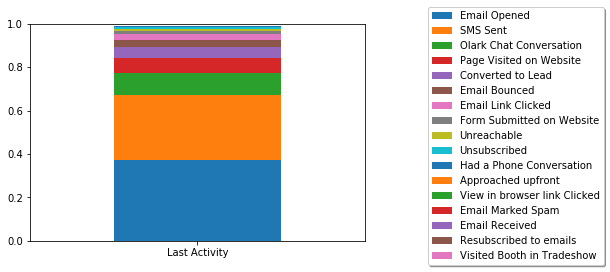

In [37]:
lastActivity = check_skewness('Last Activity')
#print(df)
ax = plt.subplot(1,1,1)
lastActivity.plot(kind='bar',stacked=True,ax = ax)
plt.xticks(rotation=0)
ax.set_ylim([0.0,1.0])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1.1), shadow=True, ncol=1)

In [38]:
lastActivity.T

,Last Activity
Email Opened,0.372010
SMS Sent,0.297110
Olark Chat Conversation,0.105314
Page Visited on Website,0.069272
Converted to Lead,0.046325
Email Bounced,0.035177
Email Link Clicked,0.028899
Form Submitted on Website,0.012555
Unreachable,0.010066
Unsubscribed,0.006602


- 37% of rows have `Email Opened` as the value of `Last Activity`
- Replacing 103 missing values of `Last Activity` with `Email Opened`

In [39]:
lead_data.loc[lead_data['Last Activity'].isnull(),['Last Activity']] = 'Email Opened'
check_skewness('Last Activity').T

,Last Activity
Email Opened,0.383158
SMS Sent,0.297110
Olark Chat Conversation,0.105314
Page Visited on Website,0.069272
Converted to Lead,0.046325
Email Bounced,0.035177
Email Link Clicked,0.028899
Form Submitted on Website,0.012555
Unreachable,0.010066
Unsubscribed,0.006602


In [40]:
round(100*(lead_data[cat_cols].isnull().sum()/len(lead_data.index)), 2)

Lead Origin                            0.00
Lead Source                            0.00
Last Activity                          0.00
Country                               26.63
Specialization                        15.56
How did you hear about X Education    23.89
Occupation                            29.12
Tags                                  36.28
Lead Profile                          29.32
City                                  15.37
Free copy required                     0.00
Last Notable Activity                  0.00
dtype: float64

#### Handling Country

In [41]:
check_skewness('Country').T

,Country
India,0.702673
United States,0.007468
United Arab Emirates,0.005737
Singapore,0.002598
Saudi Arabia,0.002273
United Kingdom,0.001624
Australia,0.001407
Qatar,0.001082
Bahrain,0.000758
Hong Kong,0.000758


In [42]:
print('Missing country values: {}'.format(lead_data['Country'].isnull().sum()))
print('Rows where country and city both are missing: {}'.format(len(lead_data.loc[(lead_data['Country'].isnull() & lead_data['City'].isnull())])))

Missing country values: 2460
Rows where country and city both are missing: 838


In [43]:
check_count_conversion_rate('Country')

,Country,Counts,Total%,Converted
0,India,6492,0.702673,0.369840
1,United States,69,0.007468,0.260870
2,United Arab Emirates,53,0.005737,0.377358
3,Singapore,24,0.002598,0.458333
4,Saudi Arabia,21,0.002273,0.190476
5,United Kingdom,15,0.001624,0.333333
6,Australia,13,0.001407,0.230769
7,Qatar,10,0.001082,0.100000
8,Bahrain,7,0.000758,0.571429
9,Hong Kong,7,0.000758,0.571429


#### Country seems to be an important columns as Countries like India, US, Singapore have greater than 30% conversion rate.

In [44]:
check_count_conversion_rate('City')

,City,Counts,Total%,Converted
0,Mumbai,3222,0.348739,0.406269
1,Select,2249,0.243425,0.490440
2,Thane & Outskirts,752,0.081394,0.449468
3,Other Cities,686,0.074250,0.402332
4,Other Cities of Maharashtra,457,0.049464,0.439825
5,Other Metro Cities,379,0.041022,0.406332
6,Tier II Cities,74,0.008010,0.337838


Replacing missing value of `Country` with 'Unknown' where `City` value is also missing 

In [45]:
lead_data.loc[(lead_data['Country'].isnull() & lead_data['City'].isnull()),['Country']] = 'unknown'

In [46]:
len(lead_data.loc[(lead_data['Country'].isnull() & lead_data['City'].isnull())])

0

In [47]:
def handle_country(x):
    if x['City'] in ['Mumbai' ,'Thane & Outskirts','Other Cities of Maharashtra']:
        return 'India'
    else:
        return 'unknown'
    
lead_data.loc[lead_data['Country'].isnull(),['Country']] = lead_data.loc[lead_data['Country'].isnull(),['Country','City']].apply(lambda x: handle_country(x),axis=1)

In [48]:
check_count_conversion_rate('Country')

,Country,Counts,Total%,Converted
0,India,6826,0.738825,0.389393
1,unknown,2131,0.230653,0.384327
2,United States,69,0.007468,0.260870
3,United Arab Emirates,53,0.005737,0.377358
4,Singapore,24,0.002598,0.458333
5,Saudi Arabia,21,0.002273,0.190476
6,United Kingdom,15,0.001624,0.333333
7,Australia,13,0.001407,0.230769
8,Qatar,10,0.001082,0.100000
9,Bahrain,7,0.000758,0.571429


Unkown also comes in missing value

In [49]:
lead_data['Country'].isnull().sum()

0

In [50]:
lead_data['Country'].value_counts()

India                   6826
unknown                 2131
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Germany                    4
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Sweden                     3
Netherlands                2
Philippines                2
Uganda                     2
Belgium                    2
Italy                      2
Bangladesh                 2
Asia/Pacific Region        2
China                      2
Ghana                      2
Switzerland                1
Denmark                    1
Malaysia                   1
Russia                     1
Vietnam                    1
Tanzania                   1
Liberia       

#### out of 2461 missing value of Country 2132 countries are still unknown and rest are substituted with 'India'

In [51]:
round(100*(lead_data[cat_cols].isnull().sum()/len(lead_data.index)), 2)

Lead Origin                            0.00
Lead Source                            0.00
Last Activity                          0.00
Country                                0.00
Specialization                        15.56
How did you hear about X Education    23.89
Occupation                            29.12
Tags                                  36.28
Lead Profile                          29.32
City                                  15.37
Free copy required                     0.00
Last Notable Activity                  0.00
dtype: float64

In [52]:
check_count_conversion_rate('Specialization')

,Specialization,Counts,Total%,Converted
0,Select,1942,0.210196,0.421215
1,Finance Management,976,0.105639,0.446721
2,Human Resource Management,848,0.091785,0.457547
3,Marketing Management,838,0.090702,0.486874
4,Operations Management,503,0.054443,0.473161
5,Business Administration,403,0.043619,0.444169
6,IT Projects Management,366,0.039615,0.382514
7,Supply Chain Management,349,0.037775,0.432665
8,"Banking, Investment And Insurance",338,0.036584,0.494083
9,Media and Advertising,203,0.021972,0.418719


In [53]:
#Value `Select` acts as missing value. First let is replace missing values with Select
lead_data.loc[pd.isnull(lead_data['Specialization']),['Specialization']] = 'Select'
check_count_conversion_rate('Specialization') .sort_values(by='Total%',ascending=False)           

,Specialization,Counts,Total%,Converted
0,Select,3380,0.365840,0.286686
1,Finance Management,976,0.105639,0.446721
2,Human Resource Management,848,0.091785,0.457547
3,Marketing Management,838,0.090702,0.486874
4,Operations Management,503,0.054443,0.473161
5,Business Administration,403,0.043619,0.444169
6,IT Projects Management,366,0.039615,0.382514
7,Supply Chain Management,349,0.037775,0.432665
8,"Banking, Investment And Insurance",338,0.036584,0.494083
10,Travel and Tourism,203,0.021972,0.354680


In [54]:
#actual missing %
missing_per = round(100*len(lead_data.loc[lead_data['Specialization'] == 'Select'])/len(lead_data.index),2)
print("Actual missing % of Specialization = {}".format(missing_per))

Actual missing % of Specialization = 36.58


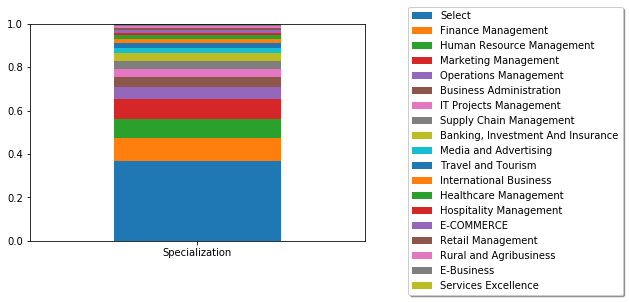

In [55]:
lastActivity = check_skewness('Specialization')
#print(df)
ax = plt.subplot(1,1,1)
lastActivity.plot(kind='bar',stacked=True,ax = ax)
plt.xticks(rotation=0)
ax.set_ylim([0.0,1.0])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1.1), shadow=True, ncol=1)

## The maximum % is still missing (Select). Better to delete rows  or Specialization column or replace by 'Fianace Management' ?

In [56]:
check_count_conversion_rate('How did you hear about X Education')

,How did you hear about X Education,Counts,Total%,Converted
0,Select,5043,0.545838,0.482054
1,Online Search,808,0.087455,0.424505
2,Word Of Mouth,348,0.037666,0.436782
3,Student of SomeSchool,310,0.033553,0.461290
4,Other,186,0.020132,0.403226
5,Multiple Sources,152,0.016452,0.368421
6,Advertisements,70,0.007577,0.457143
7,Social Media,66,0.007144,0.409091
8,Email,26,0.002814,0.500000
9,SMS,23,0.002489,0.217391


In [57]:
lead_data.loc[pd.isnull(lead_data['How did you hear about X Education']),['How did you hear about X Education']] = 'Select'
check_count_conversion_rate('How did you hear about X Education') .sort_values(by='Total%',ascending=False)    

,How did you hear about X Education,Counts,Total%,Converted
0,Select,7250,0.784717,0.374345
1,Online Search,808,0.087455,0.424505
2,Word Of Mouth,348,0.037666,0.436782
3,Student of SomeSchool,310,0.033553,0.461290
4,Other,186,0.020132,0.403226
5,Multiple Sources,152,0.016452,0.368421
6,Advertisements,70,0.007577,0.457143
7,Social Media,66,0.007144,0.409091
8,Email,26,0.002814,0.500000
9,SMS,23,0.002489,0.217391


#### 78% of values for `How did you hear about X Education` is missing. Therefore deleting this column.

In [58]:
lead_data.drop(['How did you hear about X Education'],axis=1,inplace=True)
print(lead_data.shape)

cat_cols.remove('How did you hear about X Education')
cat_cols

(9239, 19)


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'Occupation',
 'Tags',
 'Lead Profile',
 'City',
 'Free copy required',
 'Last Notable Activity']

In [59]:
round(100*(lead_data[cat_cols].isnull().sum()/len(lead_data.index)), 2)


Lead Origin               0.00
Lead Source               0.00
Last Activity             0.00
Country                   0.00
Specialization            0.00
Occupation               29.12
Tags                     36.28
Lead Profile             29.32
City                     15.37
Free copy required        0.00
Last Notable Activity     0.00
dtype: float64

#### Handling Occupation               

In [60]:
lead_data['Occupation'].isnull().sum()

2690

In [61]:
check_count_conversion_rate('Occupation') .sort_values(by='Total%',ascending=False)

,Occupation,Counts,Total%,Converted
0,Unemployed,5599,0.606018,0.435792
1,Working Professional,706,0.076415,0.916431
2,Student,210,0.022730,0.371429
3,Other,16,0.001732,0.625000
4,Housewife,10,0.001082,1.000000
5,Businessman,8,0.000866,0.625000


#### Inferences:
- 60% of leads are Unemplolyed and they have good conversion rate of 43%
- Though number of working professional is less, but their conversion rate is higher at 91%
- The missing percentage is 29%. Replacing with mode might skew the data.
- Therefore, Replacing null values in Occupation with value `Missing`

In [62]:
lead_data.loc[pd.isnull(lead_data['Occupation']),['Occupation']] = 'Missing'
check_count_conversion_rate('Occupation') .sort_values(by='Total%',ascending=False)

,Occupation,Counts,Total%,Converted
0,Unemployed,5599,0.606018,0.435792
1,Missing,2690,0.291157,0.137546
2,Working Professional,706,0.076415,0.916431
3,Student,210,0.022730,0.371429
4,Other,16,0.001732,0.625000
5,Housewife,10,0.001082,1.000000
6,Businessman,8,0.000866,0.625000


#### Handling Tags                     

In [63]:
lead_data['Tags'].isnull().sum()

3352

In [64]:
check_count_conversion_rate('Tags').sort_values(by='Total%',ascending=False)

,Tags,Counts,Total%,Converted
0,Will revert after reading the email,2072,0.224267,0.968629
1,Ringing,1203,0.130209,0.028263
2,Interested in other courses,513,0.055525,0.025341
3,Already a student,465,0.050330,0.006452
4,Closed by Horizzon,358,0.038749,0.994413
5,switched off,240,0.025977,0.016667
6,Busy,186,0.020132,0.564516
7,Lost to EINS,175,0.018941,0.977143
8,Not doing further education,145,0.015694,0.006897
9,Interested in full time MBA,117,0.012664,0.025641


In [65]:
lead_data.loc[pd.isnull(lead_data['Tags']),['Tags']] = 'Missing'
check_count_conversion_rate('Tags') .sort_values(by='Total%',ascending=False)

,Tags,Counts,Total%,Converted
0,Missing,3352,0.362810,0.249105
1,Will revert after reading the email,2072,0.224267,0.968629
2,Ringing,1203,0.130209,0.028263
3,Interested in other courses,513,0.055525,0.025341
4,Already a student,465,0.050330,0.006452
5,Closed by Horizzon,358,0.038749,0.994413
6,switched off,240,0.025977,0.016667
7,Busy,186,0.020132,0.564516
8,Lost to EINS,175,0.018941,0.977143
9,Not doing further education,145,0.015694,0.006897


#### Handling Lead Profile 

In [66]:
lead_data['Lead Profile'].isnull().sum()

2709

In [67]:
check_count_conversion_rate('Lead Profile') .sort_values(by='Total%',ascending=False)

,Lead Profile,Counts,Total%,Converted
0,Select,4145,0.448642,0.407961
1,Potential Lead,1613,0.174586,0.785493
2,Other Leads,487,0.052711,0.369610
3,Student of SomeSchool,241,0.026085,0.037344
4,Lateral Student,24,0.002598,0.958333
5,Dual Specialization Student,20,0.002165,1.000000


In [68]:
#replacing nans with select to get total missing percentage
lead_data.loc[pd.isnull(lead_data['Lead Profile']),['Lead Profile']] = 'Select'
check_count_conversion_rate('Lead Profile') .sort_values(by='Total%',ascending=False)

,Lead Profile,Counts,Total%,Converted
0,Select,6854,0.741855,0.300700
1,Potential Lead,1613,0.174586,0.785493
2,Other Leads,487,0.052711,0.369610
3,Student of SomeSchool,241,0.026085,0.037344
4,Lateral Student,24,0.002598,0.958333
5,Dual Specialization Student,20,0.002165,1.000000


#### 74% of the data is missing for column `Lead Profile`, therefore, deleting the column

In [69]:
lead_data.drop(['Lead Profile'],axis=1,inplace=True)
print(lead_data.shape)

cat_cols.remove('Lead Profile')
cat_cols

(9239, 18)


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'Occupation',
 'Tags',
 'City',
 'Free copy required',
 'Last Notable Activity']

#### Handling City                      

In [70]:
lead_data['City'].isnull().sum()

1420

In [71]:
check_count_conversion_rate('City') .sort_values(by='Total%',ascending=False)

,City,Counts,Total%,Converted
0,Mumbai,3222,0.348739,0.406269
1,Select,2249,0.243425,0.490440
2,Thane & Outskirts,752,0.081394,0.449468
3,Other Cities,686,0.074250,0.402332
4,Other Cities of Maharashtra,457,0.049464,0.439825
5,Other Metro Cities,379,0.041022,0.406332
6,Tier II Cities,74,0.008010,0.337838


In [72]:
#replacing nans with select to get total count
lead_data.loc[pd.isnull(lead_data['City']),['City']] = 'Select'
check_count_conversion_rate('City') .sort_values(by='Total%',ascending=False)

,City,Counts,Total%,Converted
0,Select,3669,0.397121,0.342600
1,Mumbai,3222,0.348739,0.406269
2,Thane & Outskirts,752,0.081394,0.449468
3,Other Cities,686,0.074250,0.402332
4,Other Cities of Maharashtra,457,0.049464,0.439825
5,Other Metro Cities,379,0.041022,0.406332
6,Tier II Cities,74,0.008010,0.337838


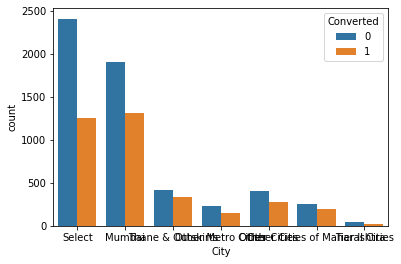

In [73]:
sns.countplot(x='City',hue='Converted',data=lead_data)

#### Inference
- Close to 40% of the values are missing
- Each value have equal probaility of conversion(~40%), which might not help in prediction
- As city column is not adding value, deleting the column

In [74]:
lead_data.drop(['City'],axis=1,inplace=True)
print(lead_data.shape)

cat_cols.remove('City')
cat_cols

(9239, 17)


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'Occupation',
 'Tags',
 'Free copy required',
 'Last Notable Activity']

In [75]:
round(100*(lead_data[cat_cols].isnull().sum()/len(lead_data.index)), 2)


Lead Origin              0.0
Lead Source              0.0
Last Activity            0.0
Country                  0.0
Specialization           0.0
Occupation               0.0
Tags                     0.0
Free copy required       0.0
Last Notable Activity    0.0
dtype: float64

In [76]:
lead_data.shape

(9239, 17)

#### Till now 
- only 1 row deleted
- 20 columns deleted(14 skewed, 5 missing >45, 1 based on data)

#### 2.3 Cleaning and Visualizing numerical variables<a id='step2.3'></a>

In [77]:
lead_data['TotalVisits'].isnull().sum()

136

In [78]:
num_cols = ['TotalVisits','Website Time','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']
num_cols

['TotalVisits',
 'Website Time',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

#### Total Visits 

In [79]:
### Visualising Total visits data 
lead_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

ValueError: cannot convert float NaN to integer

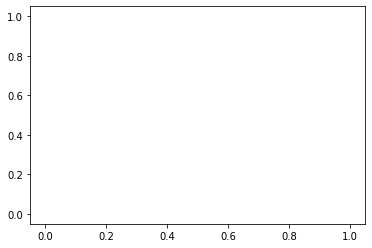

In [80]:
sns.distplot(lead_data['TotalVisits'])

In [ ]:
### Analysing Total visits data 
lead_data['TotalVisits'].median() ##3.0
lead_data['TotalVisits'].mean() ##3.45
## Since the Total visits cannot be fractional,replacing with 3 considering both mean and median values
lead_data.loc[pd.isnull(lead_data['TotalVisits']),'TotalVisits']=lead_data['TotalVisits'].median()

In [ ]:
lead_data['TotalVisits'].isnull().sum()

#### Page Views Per Visit

In [ ]:
lead_data['Page Views Per Visit'].isnull().sum()

In [ ]:
lead_data['Page Views Per Visit'].value_counts()

In [ ]:
## Analysing Page views per visit data
lead_data['Page Views Per Visit'].median() ## 2.0
lead_data['Page Views Per Visit'].mean() ## 2.36
lead_data.loc[pd.isnull(lead_data['TotalVisits']),'TotalVisits']=lead_data['TotalVisits'].median()
lead_data.loc[pd.isnull(lead_data['Page Views Per Visit']),'Page Views Per Visit']=lead_data['Page Views Per Visit'].median()

In [ ]:
lead_data['Page Views Per Visit'].isnull().sum()

In [ ]:
lead_data.info()

#### 2.4 Outlier Treatment<a id='step2.4'></a>

In [ ]:
plt.figure(figsize=(15,15))
for col in num_cols:
    plt.subplot(2,3,num_cols.index(col)+1)
    sns.boxplot(y=col,data=lead_data,palette='rainbow')

#### Observation:
Total Visits and Page views per visit have Outliers

In [ ]:
lead_data[['TotalVisits','Page Views Per Visit']].describe(percentiles=(0.95,0.99))

In [ ]:
lead_data['TotalVisits'].value_counts(ascending=False)

## capping at 99% value - 17

lead_data.loc[lead_data['TotalVisits']>17,['TotalVisits']]=17

In [ ]:
lead_data['TotalVisits'].value_counts(ascending=False)

In [ ]:
## Capping at 99% value - 9

lead_data.loc[lead_data['Page Views Per Visit']>9,'Page Views Per Visit']=9
lead_data['Page Views Per Visit'].value_counts()

In [ ]:
## Replotting the box plots

plt.figure(figsize=(15,15))
for col in num_cols:
    plt.subplot(2,3,num_cols.index(col)+1)
    sns.boxplot(y=col,data=lead_data)


#### 2.5 Check for duplicates<a id='step2.5'></a>

#### 2.6 Check for data type conversion<a id='step2.6'></a>

In [ ]:
lead_data.info()

#### Observation : 
No datatype conversion required

## Step 3. Preprocessing and Data Preparation<a id='step3'></a>

#### 3.1 Categorizing variables<a id='step3.1'></a>

#### 3.2 Creating dummy variables<a id='step3.2'></a>

In [ ]:
### Creating dummies for binary columns with Yes/No values
binary_cols=['Free copy required']
binary_cols

In [ ]:
for col in binary_cols:
    lead_data[col]=lead_data[col].map({'Yes':1,'No':0})

In [ ]:
#lead_data['Do Not Email'].value_counts()
#print(lead_data['Do Not Call'].value_counts())

In [ ]:
#lead_data['Do Not Call'].value_counts()

In [ ]:
#lead_data['Through Recommendations'].value_counts()

In [ ]:
lead_data['Free copy required'].value_counts()

#### 3.3 Train test split<a id='step3.3'></a>

#### 3.4 Scaling data<a id='step3.4'></a>

#### 3.3 Creating dummy variables <a id='step3.3' ></a>